## Predicting Credit Card Customer Segmentation

In [1]:
import subprocess
import sys

# Create virtual environment
subprocess.run([sys.executable, "-m", "venv", "myenv"])

# The activation part needs to be done in your terminal
print("Virtual environment created. Please activate it manually:")
print("On Windows: myenv\\Scripts\\activate")
print("On macOS/Linux: source myenv/bin/activate")
print("Then run: pip install streamlit")

Virtual environment created. Please activate it manually:
On Windows: myenv\Scripts\activate
On macOS/Linux: source myenv/bin/activate
Then run: pip install streamlit


In [ ]:
myenv\\Scripts\\activate

In [114]:
# Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

ImportError: Traceback (most recent call last):
  File "C:\Users\yared\anaconda3\Lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 73, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: A dynamic link library (DLL) initialization routine failed.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.

**Definitions**
* **CLIENTNUM:** Unique identifier for each customer. (Integer)
* **Attrition_Flag**: Flag indicating whether or not the customer has churned out. (Boolean)
* **Customer_Age:** Age of customer. (Integer)
* **Gender:** Gender of customer. (String)
* **Dependent_count:** Number of dependents that customer has. (Integer)
* **Education_Level:** Education level of customer. (String)
* **Marital_Status:** Marital status of customer. (String)
* **Income_Category:** Income category of customer. (String)
* **Card_Category:** Type of card held by customer. (String)
* **Months_on_book:** How long customer has been on the books. (Integer)
* **Total_Relationship_Count:** Total number of relationships customer has with the credit card provider. (Integer)
* **Months_Inactive_12_mon:** Number of months customer has been inactive in the last twelve months. (Integer)
* **Contacts_Count_12_mon:** Number of contacts customer has had in the last twelve months. (Integer)
* **Credit_Limit:** Credit limit of customer. (Integer)
* **Total_Revolving_Bal:** Total revolving balance of customer. (Integer)
* **Avg_Open_To_Buy:** Average open to buy ratio of customer. (Integer)
* **Total_Amt_Chng_Q4_Q1:** Total amount changed from quarter 4 to quarter 1. (Integer)
* **Total_Trans_Amt:** Total transaction amount. (Integer)
* **Total_Trans_Ct:** Total transaction count. (Integer)
* **Total_Ct_Chng_Q4_Q1:** Total count changed from quarter 4 to quarter 1. (Integer)
* **Avg_Utilization_Ratio:** Average utilization ratio of customer. (Integer)
* **Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1:** Naive Bayes classifier for predicting whether or not someone will churn based on characteristics such

## Exploring Dataset

In [3]:
# Loading dataset
df = pd.read_csv("BankChurners.csv")

In [7]:
# Exploring dataset
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [27]:
print(f"\nDataset Shape: {df.shape}")
print(f"\nDataset missing values: \n{df.isnull().sum()}")


Dataset Shape: (10127, 23)

Dataset missing values: 
CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                    

In [15]:
df['Attrition_Flag'].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

## Data Cleaning

In [70]:
# Eliminate unnecesary columns, 
# Naive_Bayes columns are referring to models created by the author of the dataset downloaded from kaggle.
df_clean = df.drop(columns=['CLIENTNUM', 
                            'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
                            'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

# Processing the target value
df_clean['Attrition_Flag'] = df_clean['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})
df_clean['Attrition_Flag'].value_counts()

Attrition_Flag
0    8500
1    1627
Name: count, dtype: int64

In [76]:
print(f"\nDataset Shape: {df_clean.shape}")
df_clean.head()


Dataset Shape: (10127, 20)


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# Exploratory Data Analysis (EDA)

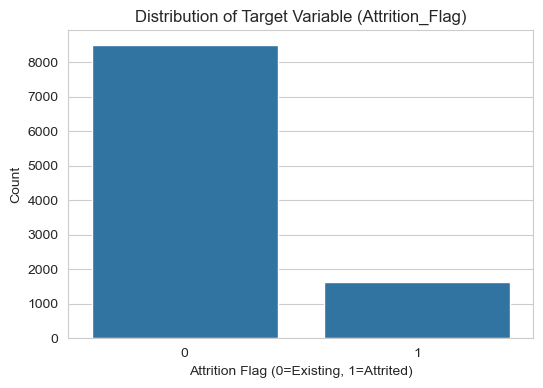

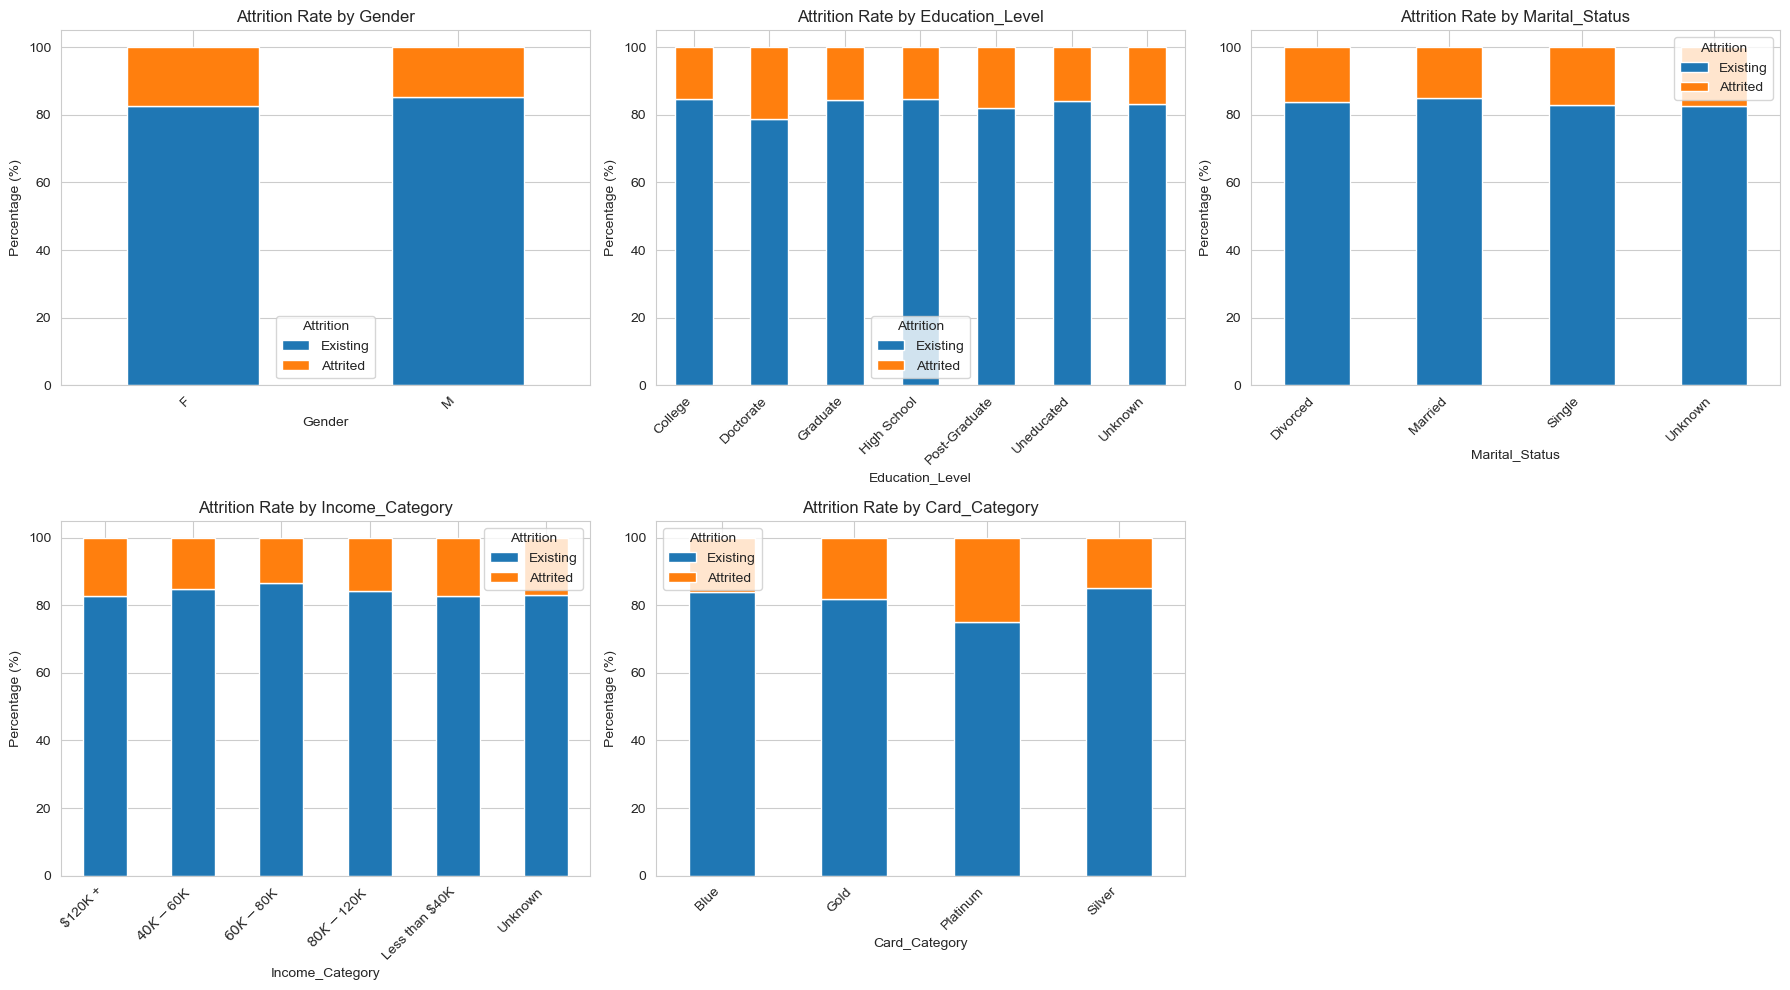

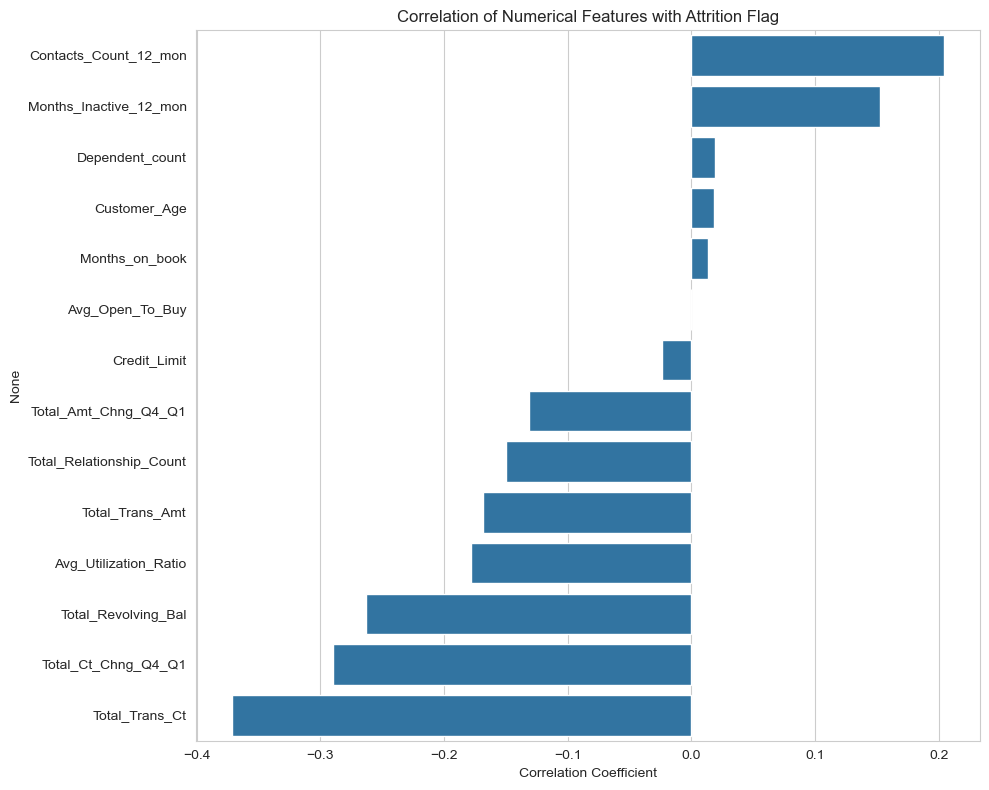

In [83]:
# Setting style of graphs
sns.set_style("whitegrid")

# Target value graph
plt.figure(figsize=(6,4))
sns.countplot(x=df_clean['Attrition_Flag'])
plt.title('Distribution of Target Variable (Attrition_Flag)')
plt.xlabel('Attrition Flag (0=Existing, 1=Attrited)')
plt.ylabel('Count')
plt.show()

categorical_features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

# Graphs for categorical features
fig, axes = plt.subplots(2, 3, figsize=(18, 10)) # 2 rows, 3 columns of plots
axes = axes.ravel() # Flatten the 2D array of axes for easy indexing

for i, col in enumerate(categorical_features):
    # Create a cross-tabulation and plot a stacked bar chart
    ct = pd.crosstab(df_clean[col], df_clean['Attrition_Flag'], normalize='index') * 100
    ct.plot(kind='bar', ax=axes[i], stacked=True)
    axes[i].set_title(f'Attrition Rate by {col}')
    axes[i].set_ylabel('Percentage (%)')
    axes[i].legend(title='Attrition', labels=['Existing', 'Attrited'])
    # Rotate x-labels if they are long
    plt.setp(axes[i].xaxis.get_majorticklabels(), rotation=45, ha='right')

# Hide any empty subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

# Select numerical columns
numerical_features = df_clean.select_dtypes(include=[np.number]).columns.drop('Attrition_Flag')

# Correlation matrix
corr_matrix = df_clean[numerical_features].corrwith(df_clean['Attrition_Flag']).sort_values(ascending=False)

# Graphs for correlations
plt.figure(figsize=(10, 8))
sns.barplot(x=corr_matrix.values, y=corr_matrix.index)
plt.title('Correlation of Numerical Features with Attrition Flag')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

1. "No significant attrition rate in categorical features... approximately 20% evenly distributed."

This is a powerful insight. It tells us that simple demographic information (Gender, Education, Marital Status, etc.) alone is not a strong predictor of whether a customer will leave. The attrition rate is consistent across all categories. This means the bank's churn problem is not isolated to a specific demographic group; it's a broader issue.

2. "Contacts_Count_12_mon (0.21) and Months_Inactive_12_mon (0.15) are the highest..."

This is the heart of the story. The strongest signals are not who the customer is, but how they behave.

Contacts_Count_12_mon (Positive Correlation: 0.21): The more a customer contacts the bank (likely calls customer service), the more likely they are to churn. This often indicates problems, complaints, or dissatisfaction.

Months_Inactive_12_mon (Positive Correlation: 0.15): The more inactive a customer is, the more likely they are to leave. Inactivity is a classic early warning sign of churn.

3. "The negative correlations are Total_Trans_Ct (-0.35)..."

This is the other side of the behavioral story and the strongest signal in your data.

Total_Trans_Ct (Negative Correlation: -0.35): This is the most important feature. The more transactions a customer makes, the less likely they are to leave. A highly engaged, active customer is a happy, retained customer.

Total_Ct_Chng_Q4_Q1 (Negative Correlation: -0.28): This is a powerful derivative of the above. If a customer's transaction count decreases from Q1 to Q4 (a negative change), their likelihood of churn increases. This is a clear metric for measuring disengagement.

Total_Revolving_Bal (Negative Correlation: -0.25): Customers who regularly revolve a balance (i.e., use their card as a credit product and pay interest) are less likely to leave. They are valuable, engaged customers.

Conclusion from EDA: The main drivers of churn are behavioral, not demographic. The bank should focus on customer engagement (transaction count) and watch for warning signs (inactivity, increased service calls).ncreased service calls).

# Data Processing

In [102]:
# Separate Features (x) and target (y)
X = df_clean.drop('Attrition_Flag', axis=1)
y = df_clean['Attrition_Flag']

# Splitting data in training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

categorical_features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
numerical_features = [col for col in X.columns if col not in categorical_features]

# Create a Column Transformer
# This is "Optimization in Practice"
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),   # Scale numerical features
        ('cat', OneHotEncoder(drop='first'), categorical_features) # Encode categorical features. 'drop=first' avoids multicollinearity (Dummy Variable Trap)
    ])

# Apply transformations
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test) # Important: Use transform, not fit_transform on the test set!

print("Training shape before preprocessing:", X_train.shape)
print("Training shape after preprocessing: ", X_train_processed.shape)
print("\nA peek at the scaled numerical data (first 5 rows, first 5 columns):")
print(X_train_processed[:5, :5])

Training shape before preprocessing: (8101, 19)
Training shape after preprocessing:  (8101, 32)

A peek at the scaled numerical data (first 5 rows, first 5 columns):
[[-1.30123226e+00 -1.80990009e+00 -1.51320461e+00  1.22195726e-01
   6.46494654e-01]
 [-2.99340155e-01  5.01503058e-01 -7.00147109e-04  7.65410526e-01
  -3.42412671e-01]
 [-4.88671295e-02 -2.68964659e-01 -7.56952378e-01  1.40862533e+00
   6.46494654e-01]
 [-1.30123226e+00 -2.68964659e-01 -1.51320461e+00 -5.21019074e-01
  -1.33132000e+00]
 [ 4.52078921e-01 -1.03943238e+00  5.03468007e-01  1.22195726e-01
  -3.42412671e-01]]


## Logistic Regression

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1701
           1       0.77      0.54      0.64       325

    accuracy                           0.90      2026
   macro avg       0.85      0.76      0.79      2026
weighted avg       0.89      0.90      0.89      2026



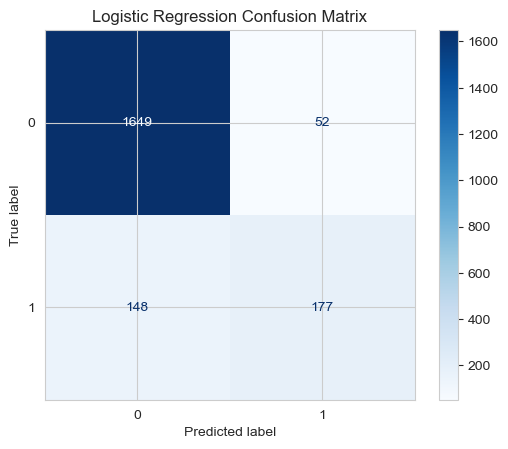

In [107]:
# 1. Create and train the Logistic Regression model
# The 'liblinear' solver is a good choice for smaller datasets and binary classification.
logreg_model = LogisticRegression(random_state=42, solver='liblinear')
logreg_model.fit(X_train_processed, y_train)

# 2. Make predictions on the TEST set
y_pred_logreg = logreg_model.predict(X_test_processed)

# 3. Evaluate the model's performance
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_logreg))

# 4. Plot a Confusion Matrix to see the types of errors
cm = confusion_matrix(y_test, y_pred_logreg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

Balanced Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1701
           1       0.53      0.82      0.64       325

    accuracy                           0.86      2026
   macro avg       0.75      0.84      0.78      2026
weighted avg       0.89      0.86      0.87      2026



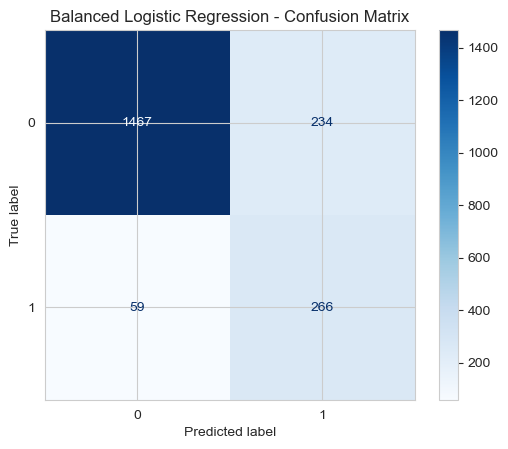

In [109]:
# 1. Create and train a NEW Logistic Regression model that accounts for class imbalance
logreg_model_balanced = LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced')
logreg_model_balanced.fit(X_train_processed, y_train)

# 2. Make new predictions
y_pred_logreg_balanced = logreg_model_balanced.predict(X_test_processed)

# 3. Evaluate the new model
print("Balanced Logistic Regression Performance:")
print(classification_report(y_test, y_pred_logreg_balanced))

# 4. Plot a new Confusion Matrix
cm_balanced = confusion_matrix(y_test, y_pred_logreg_balanced)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_balanced)
disp.plot(cmap='Blues')
plt.title('Balanced Logistic Regression - Confusion Matrix')
plt.show()